In [1]:
#Import the required library packages for the sign language classification problem
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn import linear_model

(-0.5, 63.5, 63.5, -0.5)

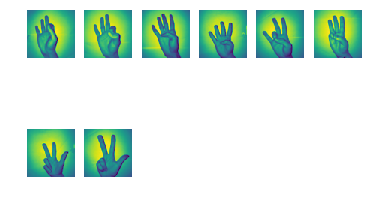

In [2]:
# Importing the numpy images of Sign Languages. Target image classification for random signs for the number "3" and the number "4"
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(2, 6, 1)
plt.imshow(x_l[0].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 6, 2)
plt.imshow(x_l[203].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 6, 3)
plt.imshow(x_l[1236].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 6, 4)
plt.imshow(x_l[1442].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 6, 5)
plt.imshow(x_l[409].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 6, 6)
plt.imshow(x_l[821].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 6, 7)
plt.imshow(x_l[1443].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 6, 8)
plt.imshow(x_l[1648].reshape(img_size, img_size))
plt.axis('off')

In [3]:
#Creating the input dependant and independant images into array.
X_s = np.concatenate((x_l[0:203], x_l[409:821], x_l[1443:1648], x_l[1236:1442]), axis=0)
z_s = np.full((820,1),3)
o_s = np.full((206,1),4)
Y_s = np.concatenate((z_s, o_s), axis=0).reshape(X_s.shape[0],1)
print("X shape: " , X_s.shape)
print("Y shape: " , Y_s.shape)

X shape:  (1026, 64, 64)
Y shape:  (1026, 1)


In [4]:
#Creating the training and the test model data and flattening the images from 3D to 2D array.
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X_s, Y_s, test_size=0.15, random_state=42)
number_of_train_s = X_train_s.shape[0]
number_of_test_s = X_test_s.shape[0]

X_train_flatten_s = X_train_s.reshape(number_of_train_s,X_train_s.shape[1]*X_train_s.shape[2])
X_test_flatten_s = X_test_s.reshape(number_of_test_s,X_test_s.shape[1]*X_test_s.shape[2])
print("X train flatten",X_train_flatten_s.shape)
print("X test flatten",X_test_flatten_s.shape)

X train flatten (872, 4096)
X test flatten (154, 4096)


In [5]:
#Creating the transpose of the array to be easily applied into the Gradient Boosting method.
x_train_s = X_train_flatten_s.T
x_test_s = X_test_flatten_s.T
y_train_s = Y_train_s.T
y_test_s = Y_test_s.T
print("x train: ",x_train_s.shape)
print("x test: ",x_test_s.shape)
print("y train: ",y_train_s.shape)
print("y test: ",y_test_s.shape)

x train:  (4096, 872)
x test:  (4096, 154)
y train:  (1, 872)
y test:  (1, 154)


In [6]:
#Step 1: Initialize the weights and bias for the model
def initialize_weights_and_bias(dimension):
    w_s = np.full((dimension,1),0.01)
    b_s = 0.0
    return w_s, b_s

#Step 2: Initialize the sigmoid function for predicting the output of the Logistic regression
def sigmoid(z):
    y_head_s = 1/(1+np.exp(-z))
    return y_head_s

#Step 3: Initialize the weforward and the rectification backward propogation model
def forward_backward_propagation(w_s,b_s,x_train_s,y_train_s):
    # forward propagation
    z_s = np.dot(w_s.T,x_train_s) + b_s
    y_head_s = sigmoid(z_s)
    loss_s = -(5-y_train_s)*np.log(y_head_s)-(5-y_train_s)*np.log(1-y_head_s)
    cost_s = (np.sum(loss_s))/x_train_s.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight_s = (np.dot(x_train_s,((y_head_s-(5-1-y_train_s)).T)))/x_train_s.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias_s = np.sum(y_head_s-(5-1-y_train_s))/x_train_s.shape[1]                 # x_train.shape[1]  is for scaling
    gradients_s = {"derivative_weight": derivative_weight_s,"derivative_bias": derivative_bias_s}
    return cost_s,gradients_s

In [7]:
# Step 4: Updating(learning) parameters
def update(w_s, b_s, x_train_s, y_train_s, learning_rate_s,number_of_iteration_s):
    cost_list_s = []
    cost_list2_s = []
    index_s = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iteration_s):
        # make forward and backward propagation and find cost and gradients
        cost_s,gradients_s = forward_backward_propagation(w_s,b_s,x_train_s,y_train_s)
        cost_list_s.append(cost_s)
        # lets update
        w_s = w_s - learning_rate_s * gradients_s["derivative_weight"]
        b_s = b_s - learning_rate_s * gradients_s["derivative_bias"]
        if i % 10 == 0:
            cost_list2_s.append(cost_s)
            index_s.append(i)
            print ("Cost after iteration %i: %f" %(i, cost_s))
    # we update(learn) parameters weights and bias
    parameters_s = {"weight": w_s,"bias": b_s}
    plt.plot(index_s,cost_list2_s)
    plt.xticks(index_s,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters_s, gradients_s, cost_list_s

In [8]:
# Step 5: Logistic Regression Classification Sigmoid prediction
def predict(w_s,b_s,x_test_s):
    # x_test is a input for forward propagation
    z_s = sigmoid(np.dot(w_s.T,x_test_s)+b_s)
    Y_prediction_s = np.zeros((1,x_test_s.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z_s.shape[1]):
        if z_s[0,i]<= 30.5:
            Y_prediction_s[0,i] = 3
        else:
            Y_prediction_s[0,i] = 4

    return Y_prediction_s

Cost after iteration 0: 50.021193
Cost after iteration 10: 5.023055
Cost after iteration 20: 3.118416
Cost after iteration 30: 2.512636
Cost after iteration 40: 2.575101
Cost after iteration 50: 9.387642
Cost after iteration 60: 4.691926
Cost after iteration 70: 4.545383
Cost after iteration 80: 8.188933
Cost after iteration 90: 2.593613
Cost after iteration 100: 3.361662
Cost after iteration 110: 4.179317
Cost after iteration 120: 6.298195
Cost after iteration 130: 3.544707
Cost after iteration 140: 3.005566
Cost after iteration 150: 3.403951
Cost after iteration 160: 3.033122
Cost after iteration 170: 3.350826
Cost after iteration 180: 2.636556
Cost after iteration 190: 2.693889
Cost after iteration 200: 2.838562
Cost after iteration 210: 2.646887
Cost after iteration 220: 2.838579
Cost after iteration 230: 2.923689
Cost after iteration 240: 3.387806
Cost after iteration 250: 2.688419
Cost after iteration 260: 2.962704
Cost after iteration 270: 3.272825
Cost after iteration 280: 2.79

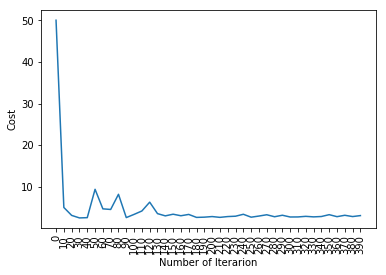

train accuracy: 80.04587155963303 %
test accuracy: 79.22077922077922 %


In [9]:
#Step 6: Initiate the Logistic Regression analysis and calculate the train and test data accuracy and the cost plot
def logistic_regression(x_train_s, y_train_s, x_test_s, y_test_s, learning_rate_s , num_iterations_s):
    # initialize
    dimension =  x_train_s.shape[0]  # that is 4096
    w_s,b_s = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters_s, gradients_s, cost_list_s = update(w_s, b_s, x_train_s, y_train_s, learning_rate_s,num_iterations_s)
    
    y_prediction_test_s = predict(parameters_s["weight"],parameters_s["bias"],x_test_s)
    y_prediction_train_s = predict(parameters_s["weight"],parameters_s["bias"],x_train_s)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train_s - y_train_s)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test_s - y_test_s)) * 100))
    
logistic_regression(x_train_s, y_train_s, x_test_s, y_test_s,learning_rate_s = 0.01, num_iterations_s = 400)

In [10]:
#The General Simple Logistic Regression has muh more accuracy than the GD Deep learning method
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train_s.T, y_train_s.T).score(x_test_s.T, y_test_s.T)))
print("train accuracy: {} ".format(logreg.fit(x_train_s.T, y_train_s.T).score(x_train_s.T, y_train_s.T)))

test accuracy: 0.9025974025974026 
train accuracy: 0.9931192660550459 


## The next application of the same modelling using Convolutional Neural Network

In [11]:
from keras.models import Sequential
from keras.layers import Dense, add, Dropout, MaxPooling2D, Conv2D, Flatten

Using TensorFlow backend.


In [12]:
#Creating the input dependant and independant images into array. The number sign 3 == 0 ; while the number sign 4 ==1
X_cnn = np.concatenate((x_l[0:203], x_l[409:821], x_l[1443:1648], x_l[1236:1442]), axis=0)
z_cnn = np.full((820,1),0)
o_cnn = np.full((206,1),1)
Y_cnn = np.concatenate((z_cnn, o_cnn), axis=0).reshape(X_cnn.shape[0],1)
print("X shape: " , X_cnn.shape)
print("Y shape: " , Y_cnn.shape)

X shape:  (1026, 64, 64)
Y shape:  (1026, 1)


In [13]:
#The train test split for performing the CNN. Then reshaping the Input dataset into 4D array.
X_train, X_test, y_train, y_test = train_test_split(X_cnn, Y_cnn, test_size=0.39, random_state=42)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [14]:
#Establishing the CNN network with 2 layers of 3x3 pool 32 layered filter and using 2 MaxPolling state to get the max value of
#squared cell. Then applying 8 hidden layers into the network gives the best accuracy to the model.
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(64,64,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
H1 = model.fit(X_train, y_train, epochs=150, batch_size=100, verbose=1, validation_split=0.2)

Train on 500 samples, validate on 125 samples
Epoch 1/150
500/500 [==============================] - 8s 16ms/step - loss: 0.6986 - acc: 0.5340 - val_loss: 0.6828 - val_acc: 0.8240
Epoch 2/150
500/500 [==============================] - 4s 9ms/step - loss: 0.6789 - acc: 0.7000 - val_loss: 0.6276 - val_acc: 0.8240
Epoch 3/150
500/500 [==============================] - 4s 9ms/step - loss: 0.6402 - acc: 0.7140 - val_loss: 0.4767 - val_acc: 0.8240
Epoch 4/150
500/500 [==============================] - 4s 9ms/step - loss: 0.6151 - acc: 0.7420 - val_loss: 0.5373 - val_acc: 0.8240
Epoch 5/150
500/500 [==============================] - 5s 9ms/step - loss: 0.6109 - acc: 0.7360 - val_loss: 0.5374 - val_acc: 0.8240
Epoch 6/150
500/500 [==============================] - 4s 9ms/step - loss: 0.6061 - acc: 0.7500 - val_loss: 0.4986 - val_acc: 0.8240
Epoch 7/150
500/500 [==============================] - 4s 9ms/step - loss: 0.5650 - acc: 0.7540 - val_loss: 0.5083 - val_acc: 0.8240
Epoch 8/150
500/500 [=

Epoch 62/150
500/500 [==============================] - 4s 9ms/step - loss: 0.1059 - acc: 0.9800 - val_loss: 1.1408 - val_acc: 0.8880
Epoch 63/150
500/500 [==============================] - 5s 9ms/step - loss: 0.1307 - acc: 0.9920 - val_loss: 1.0245 - val_acc: 0.8960
Epoch 64/150
500/500 [==============================] - 5s 10ms/step - loss: 0.1029 - acc: 0.9920 - val_loss: 1.2147 - val_acc: 0.8960
Epoch 65/150
500/500 [==============================] - 5s 9ms/step - loss: 0.1150 - acc: 0.9840 - val_loss: 1.2880 - val_acc: 0.8880
Epoch 66/150
500/500 [==============================] - 4s 9ms/step - loss: 0.1123 - acc: 0.9900 - val_loss: 1.0844 - val_acc: 0.8960
Epoch 67/150
500/500 [==============================] - 4s 9ms/step - loss: 0.1211 - acc: 0.9880 - val_loss: 1.0895 - val_acc: 0.8960
Epoch 68/150
500/500 [==============================] - 5s 9ms/step - loss: 0.1179 - acc: 0.9900 - val_loss: 1.1062 - val_acc: 0.8960
Epoch 69/150
500/500 [==============================] - 5s 10

Epoch 123/150
500/500 [==============================] - 4s 9ms/step - loss: 0.1364 - acc: 0.9700 - val_loss: 0.7804 - val_acc: 0.9120
Epoch 124/150
500/500 [==============================] - 4s 9ms/step - loss: 0.1358 - acc: 0.9820 - val_loss: 0.9887 - val_acc: 0.8640
Epoch 125/150
500/500 [==============================] - 5s 9ms/step - loss: 0.1021 - acc: 0.9760 - val_loss: 0.8824 - val_acc: 0.8800
Epoch 126/150
500/500 [==============================] - 4s 9ms/step - loss: 0.0900 - acc: 0.9920 - val_loss: 0.9491 - val_acc: 0.8800
Epoch 127/150
500/500 [==============================] - 4s 9ms/step - loss: 0.0953 - acc: 0.9860 - val_loss: 0.7556 - val_acc: 0.9040
Epoch 128/150
500/500 [==============================] - 4s 9ms/step - loss: 0.0955 - acc: 0.9920 - val_loss: 1.4135 - val_acc: 0.8400
Epoch 129/150
500/500 [==============================] - 4s 9ms/step - loss: 0.1121 - acc: 0.9880 - val_loss: 0.5503 - val_acc: 0.9200
Epoch 130/150
500/500 [==============================] 

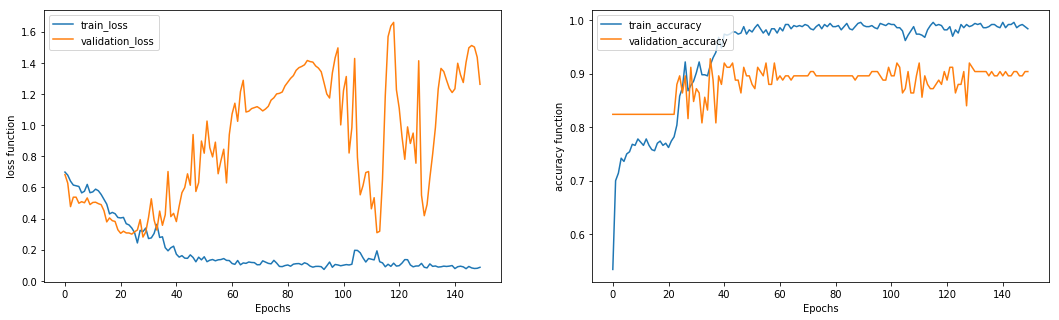

In [16]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(H1.history['loss'], label='train_loss')
plt.plot(H1.history['val_loss'], label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('loss function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H1.history['acc'], label='train_accuracy')
plt.plot(H1.history['val_acc'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy function')
plt.legend(loc='upper left')
plt.show()

In [17]:
#The Model Evaluation gives us the Test accuracy of the trained model of 94.1% accuracy.
loss, accuracy = model.evaluate(X_test, y_test)
print("The loss value for the test model:", loss*100)
print("The accuracy value for the test model:", accuracy*100)

y_pred = model.predict(X_test)
print("The actual accuracy of the predicted against the actual model:", (1-np.mean(np.abs(y_pred-y_test)))*100)

401/401 [==============================] - 1s 3ms/step
The loss value for the test model: 50.83374676279229
The accuracy value for the test model: 94.0149625935162
The actual accuracy of the predicted against the actual model: 94.17624793532562
